In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Import widgets
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

In [2]:
path = r"C:\Users\33622\Desktop\ML"

calendar_df = pd.read_excel(os.path.join(path, "calendar.xlsx"))
sample_submission = pd.read_excel(os.path.join(path, "sample_submission.xlsx"))
sales = pd.read_excel(os.path.join(path, "sales_train_evaluation.xlsx"))
train_sales = pd.read_excel(os.path.join(path, "sales_train_validation.xlsx"))

FileNotFoundError: [Errno 2] No such file or directory: 'calendar.xlsx'

In [ ]:
train_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [ ]:
val_sales= pd.read_excel(os.path.join(path, "sales_train_validation.xlsx"))
val_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
train_sales.head(5)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
item_ids=train_sales['item_id'].unique()
dept_ids=train_sales['dept_id'].unique()
store_ids=train_sales['store_id'].unique()
cat_ids=train_sales['cat_id'].unique()
state_ids=train_sales['state_id'].unique()

In [ ]:
calendar_df.head()


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
days = range(1, 1913 + 1)
time_series_columns = [f'd_{i}' for i in days]

ids = np.random.choice(train_sales['id'].unique().tolist(), 1000)

series_ids = widgets.Dropdown(
    options=ids,
    value=ids[0],
    description='series_ids:'
)

def plot_data(series_ids):
    df = train_sales.loc[train_sales['id'] == series_ids][time_series_columns]
    df = pd.Series(df.values.flatten())

    df.plot(figsize=(20, 10), lw=1, marker='*')
    df.rolling(7).mean().plot(figsize=(20, 10), lw=1, marker='o', color='orange')
    plt.axhline(df.mean(), lw=3, color='red')
    plt.grid()


/usr/local/lib/python3.10/dist-packages/traitlets/traitlets.py:711: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


###Visualizing the Time Series
Below I make a simple plot of the first time series in the data. Going through the different time series data we can see that a lot of the items have intermittent demand. These are series that have many zeros with bursts of demand inbetween. This will be one of the biggest challenges in this competition.



interactive(children=(Dropdown(description='series_ids:', options=('FOODS_3_355_WI_3_validation', 'HOUSEHOLD_2…

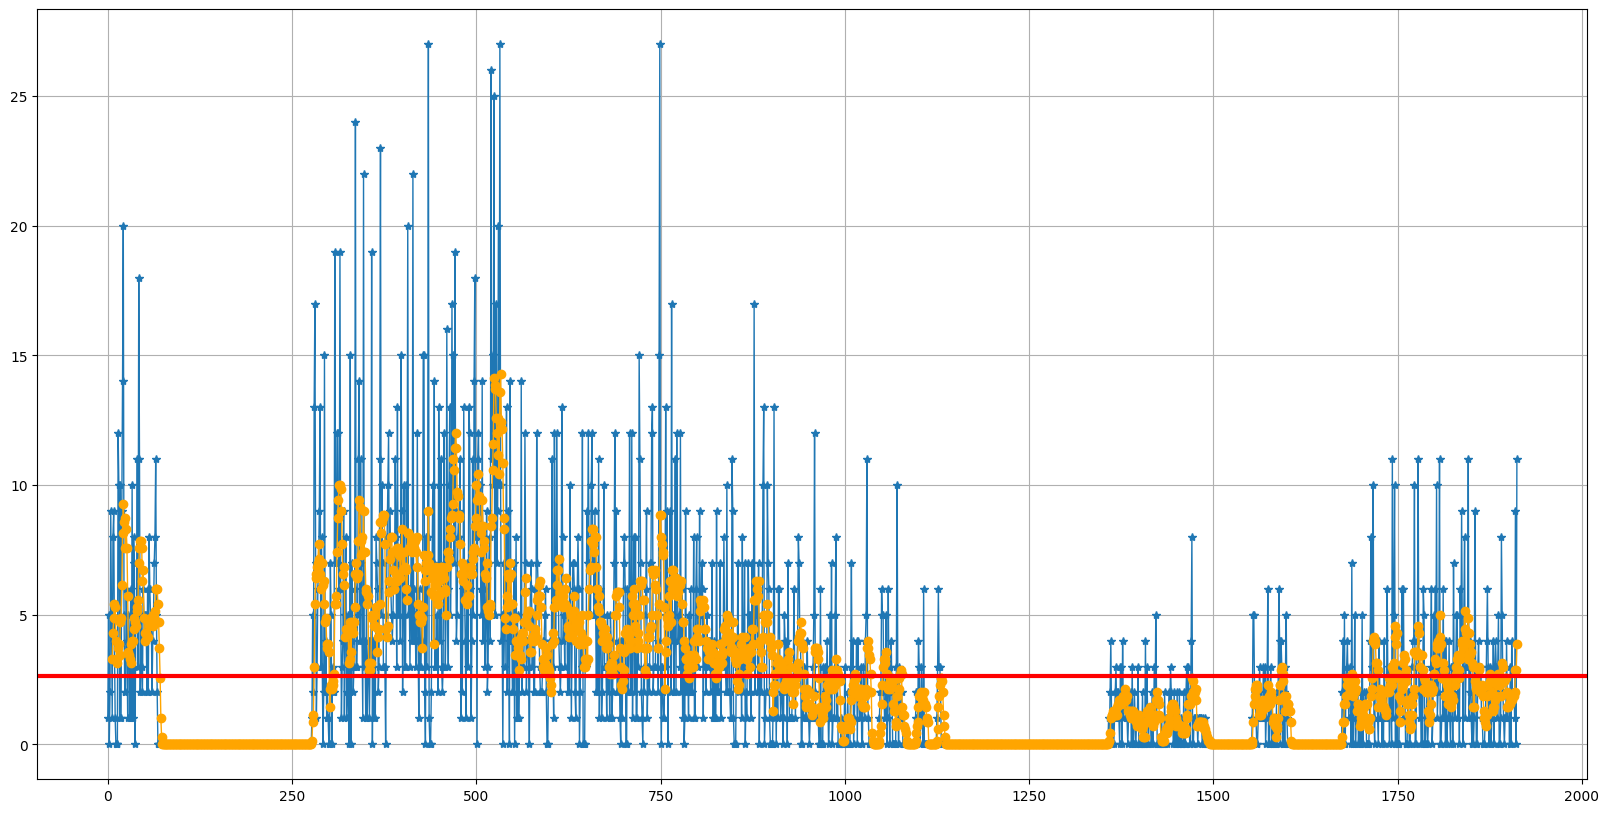

In [ ]:
w = interactive(
    plot_data,
    series_ids=series_ids
)
display(w)

In the analysis above it looks like a lot of the time series data start with leading zeros. I believe we can characterize these leading zeros as items that were not selling or available to sell for those periods of time. This might not be a good assumption for every series. We can investigate the distribution of leading zeros, this could help us bring down the large data size (although may not be a good choice for algorightms such as ARIMA).

In [ ]:
len(time_series_columns)


1913

<Axes: >

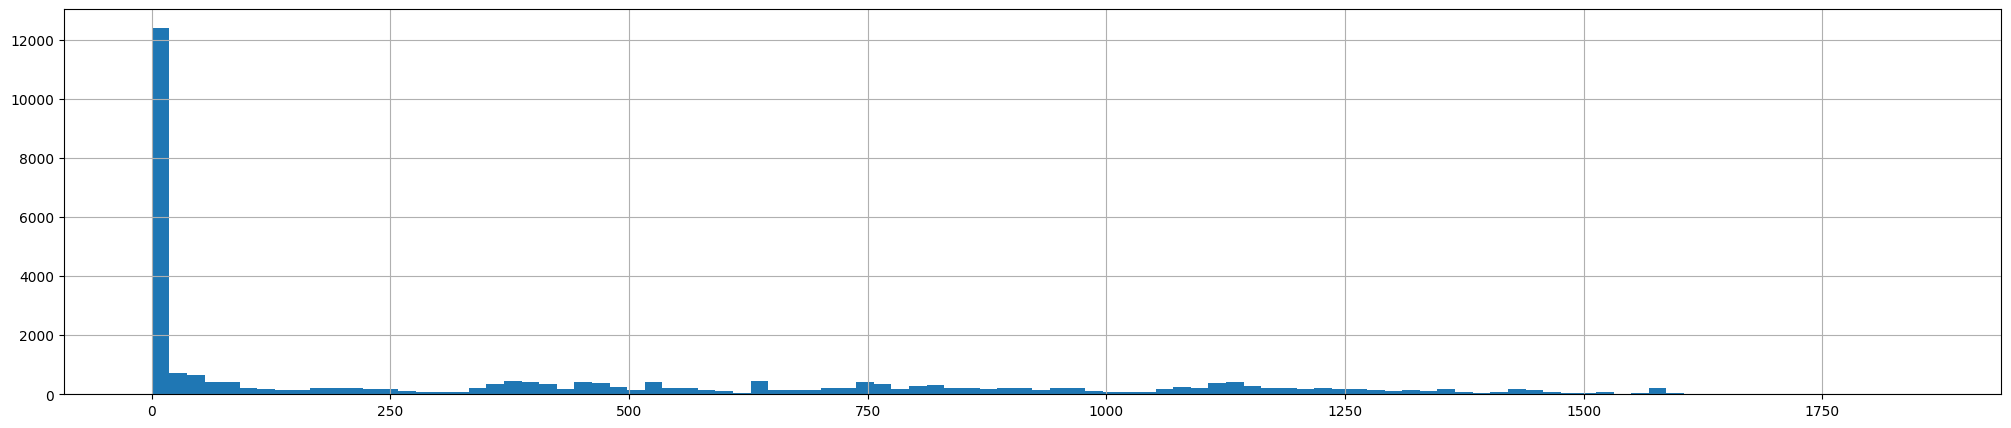

In [ ]:
series_data = train_sales[time_series_columns].values

pd.Series((series_data != 0).argmax(axis=1)).hist(figsize=(25, 5), bins=100)

What is the distribution of zeros per series? Wow, the distribution of zeros for each of the series has a mean around 0.8 which means there is a lot of intermittent data!

<Axes: >

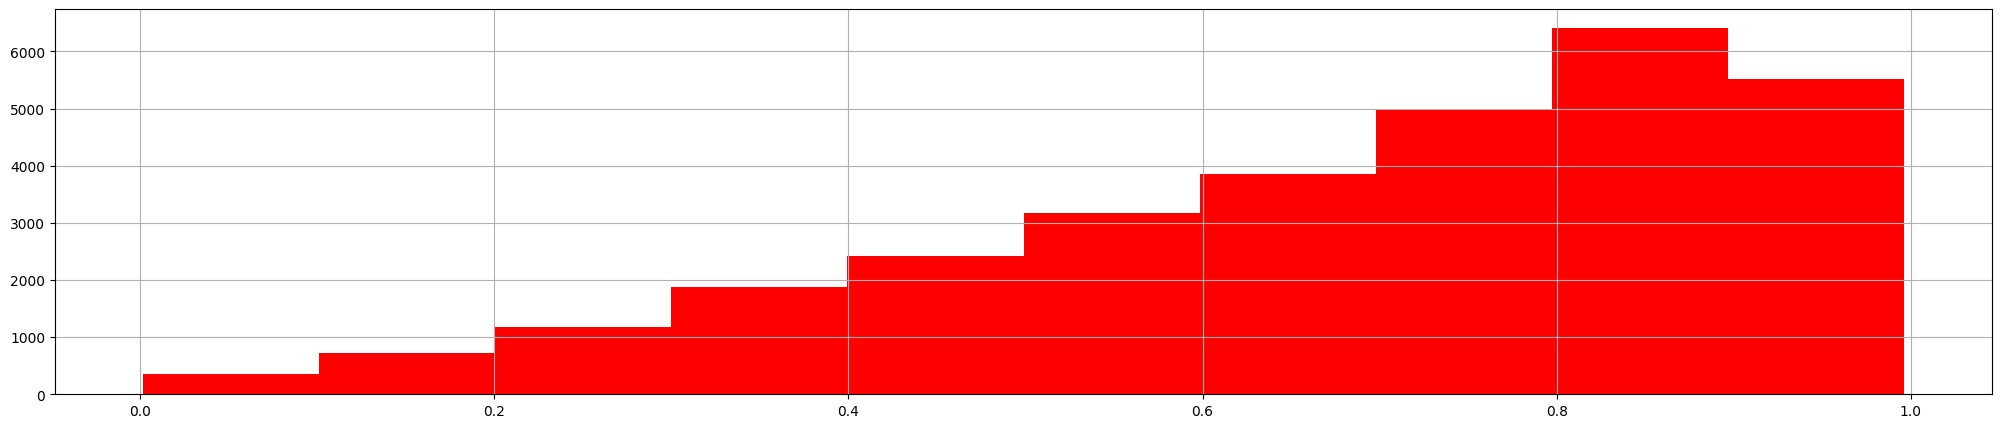

In [ ]:
pd.Series((series_data == 0).sum(axis=1) / series_data.shape[1]).hist(figsize=(25, 5), color='red')


What is the distribution of max number of sales for each of the series?

Alot of the items have a max number of sales between 2 and 12. There are also some items with a very high number of sales for a particular item. It might be fruitful to investigate these items and whether it was a holiday or not.

<Axes: >

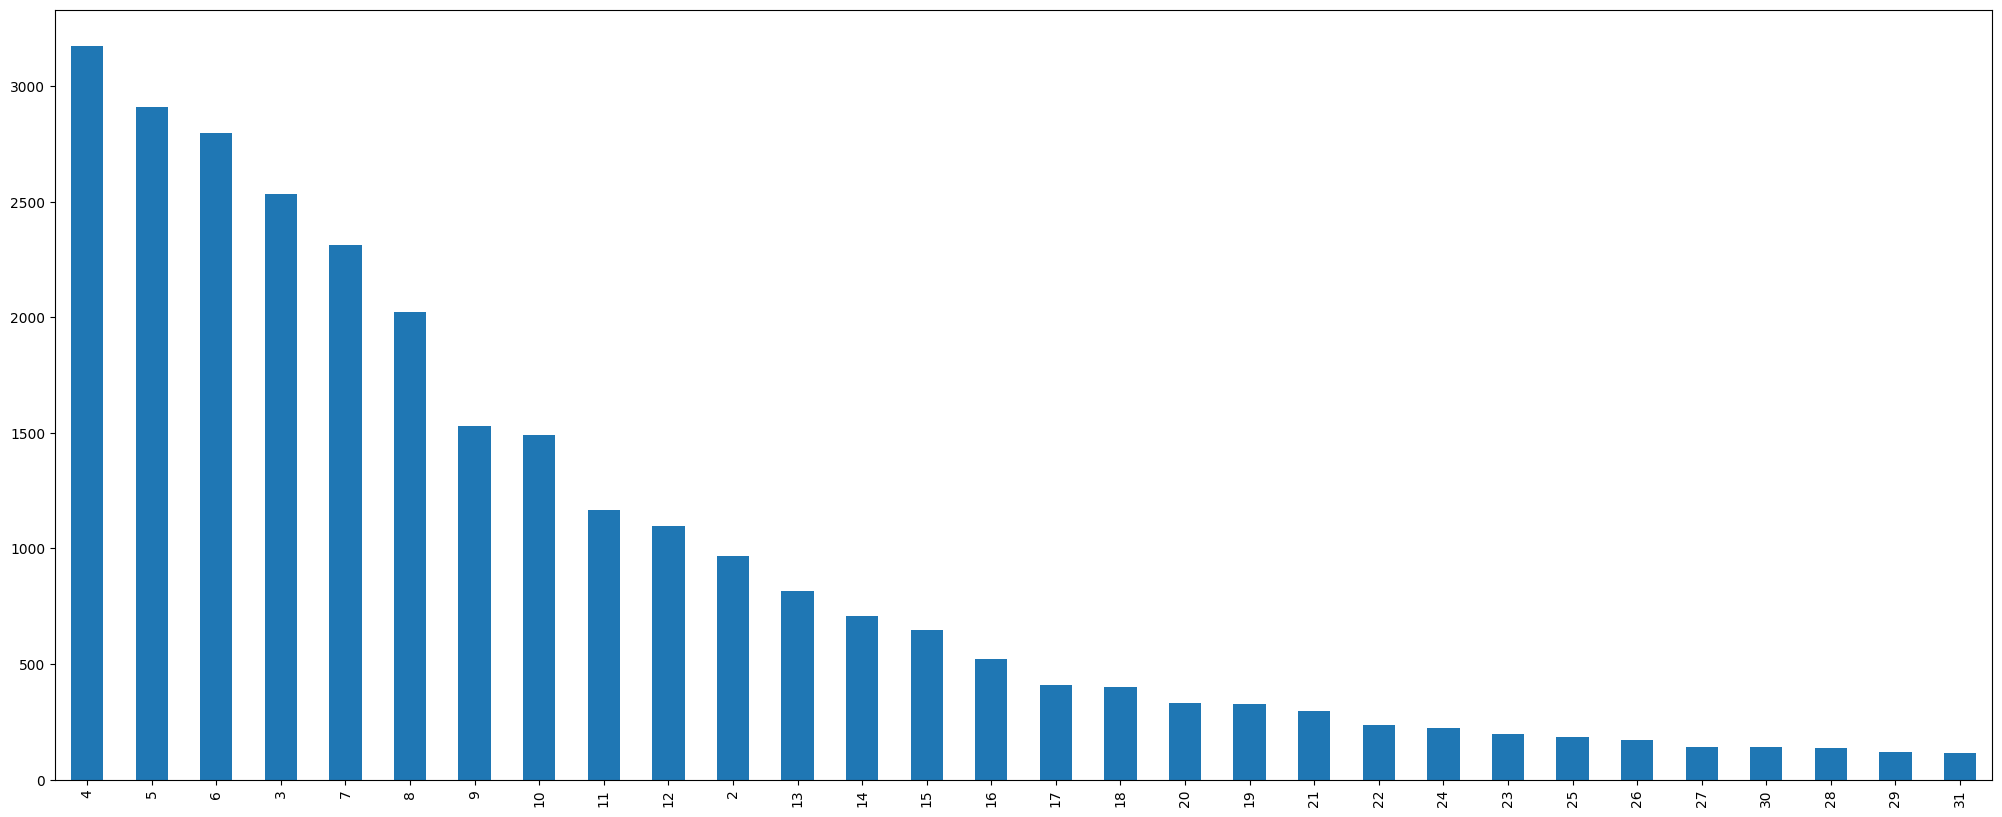

In [ ]:
pd.Series(series_data.max(axis=1)).value_counts().head(30).plot(kind='bar', figsize=(25, 10))


In [ ]:
pd.Series(series_data.max(axis=1)).value_counts().tail(10)


402    1
163    1
355    1
601    1
253    1
599    1
205    1
329    1
221    1
299    1
dtype: int64

In [ ]:
store_group=train_sales.groupby(by='store_id').sum()


<ipython-input-18-058f1f0f79fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_group=train_sales.groupby(by='store_id').sum()


In [ ]:
item_ids = train_sales['item_id'].unique()
series_item_ids = widgets.Dropdown(
    options=item_ids,
    value=item_ids[0],
    description='series_item_ids:'
)
def plot_data_level(series_ids, level='store', periods=14):

    df = train_sales.groupby(str(level+'_id'), as_index=False).sum()
    df= df.loc[df[str(level+'_id')]==series_ids][time_series_columns]
    df = pd.Series(df.values.flatten())
    df.T.plot(figsize=(20, 10), lw=2, marker='*')
    df.T.rolling(periods).mean().plot(figsize=(20, 10), lw=1, marker='o', color='orange')
    plt.axhline(df.mean(), lw=3, color='red')
    plt.grid()

interactive(children=(Dropdown(description='series_ids', options=('CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_…

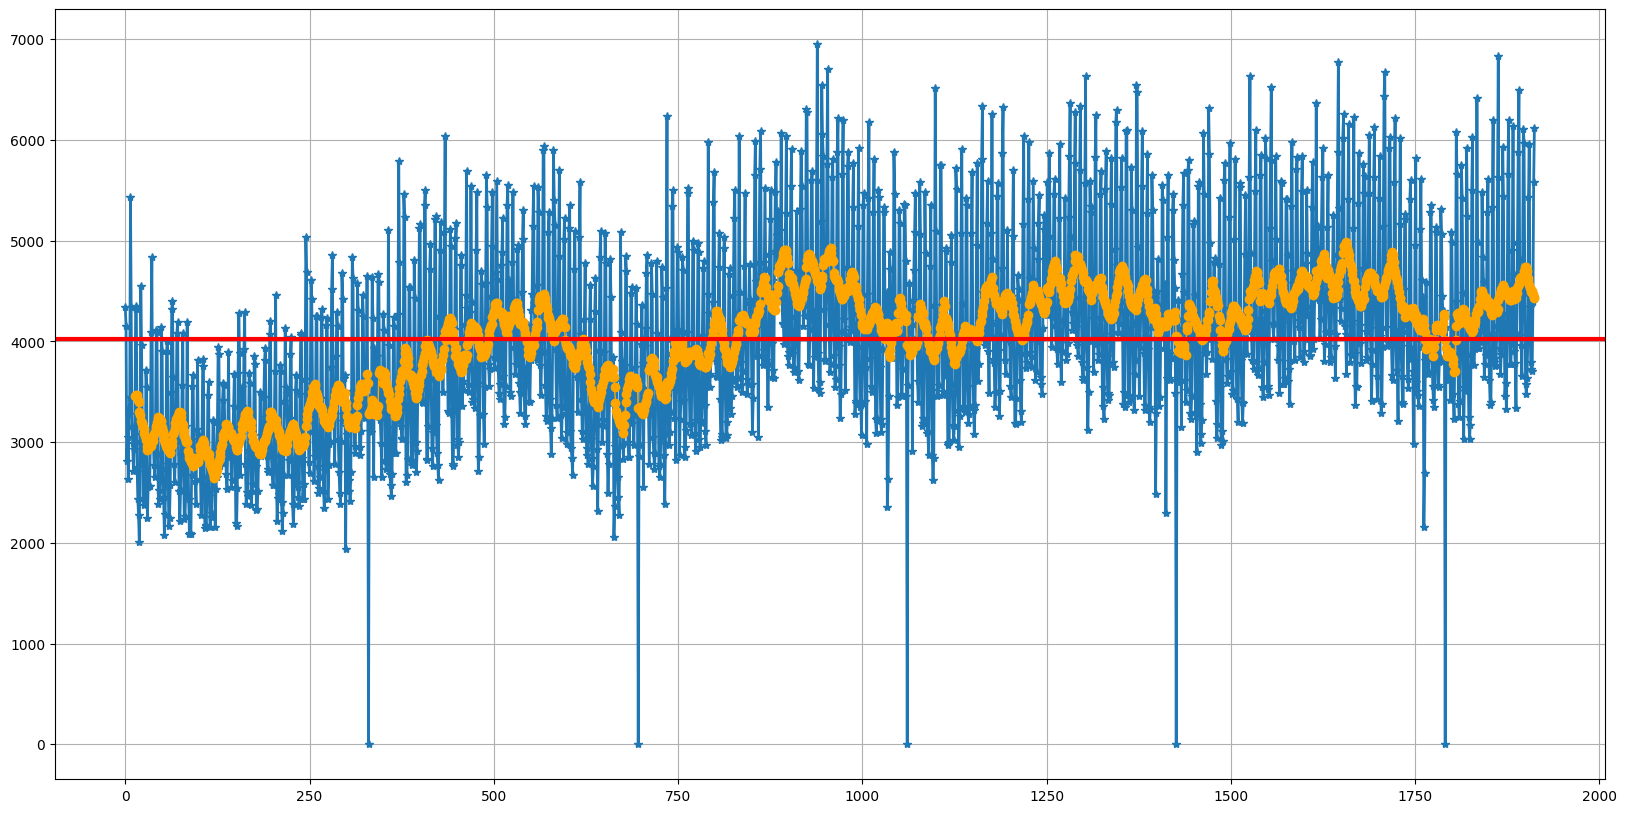

In [ ]:
w = interactive(
    plot_data_level,
    level='store',
    series_ids= store_ids
)
display(w)

interactive(children=(Dropdown(description='series_ids', options=('HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1…

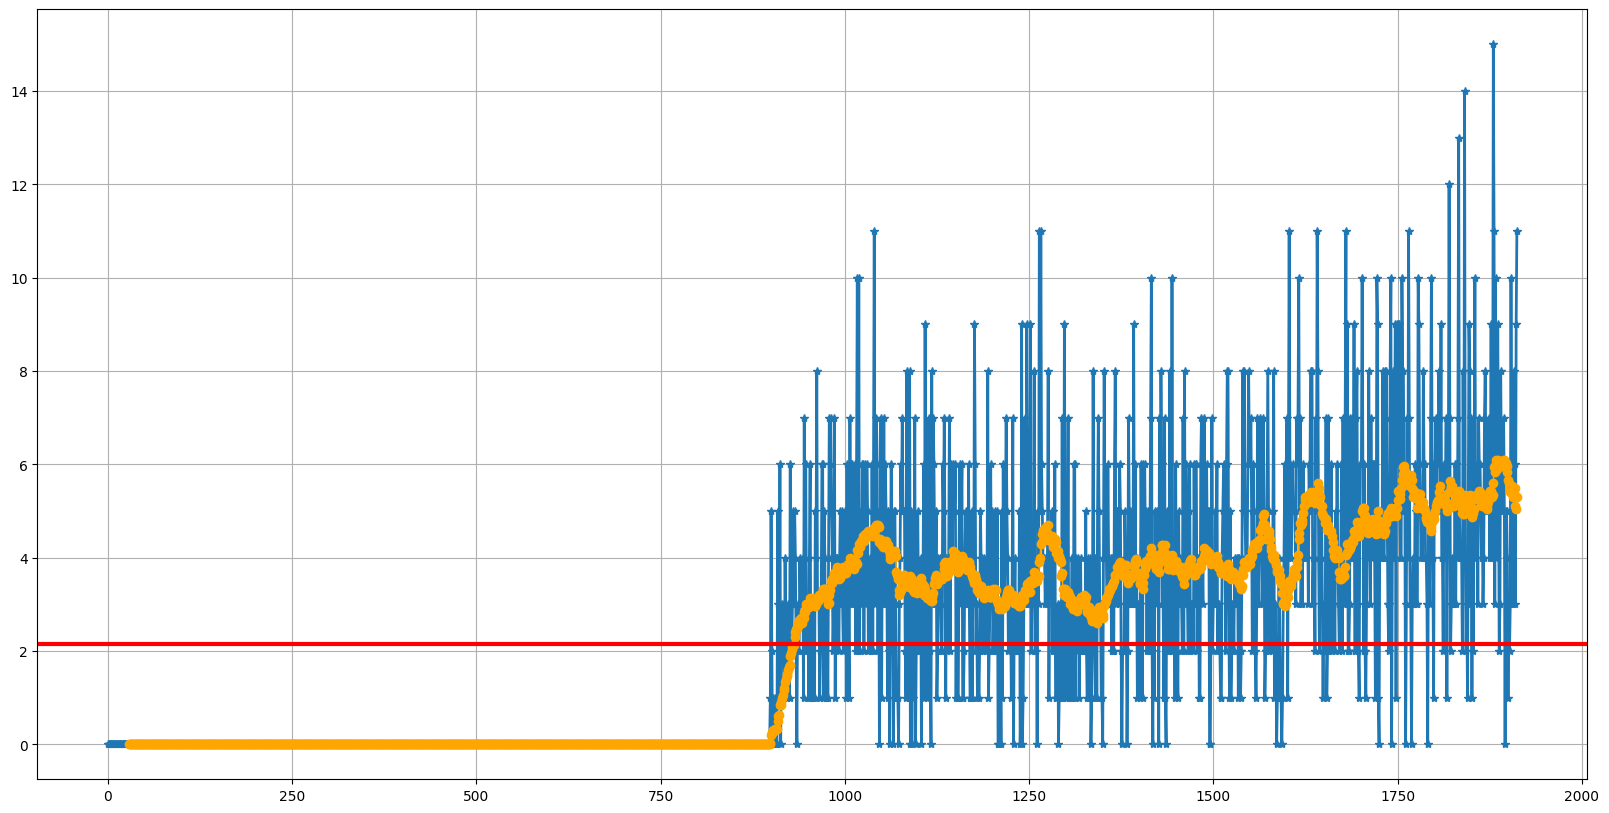

In [ ]:
w = interactive(
    plot_data_level,
    level='item',
    series_ids= item_ids,
    periods=30,
)
display(w)

interactive(children=(Dropdown(description='series_ids', options=('CA', 'TX', 'WI'), value='CA'), Text(value='…

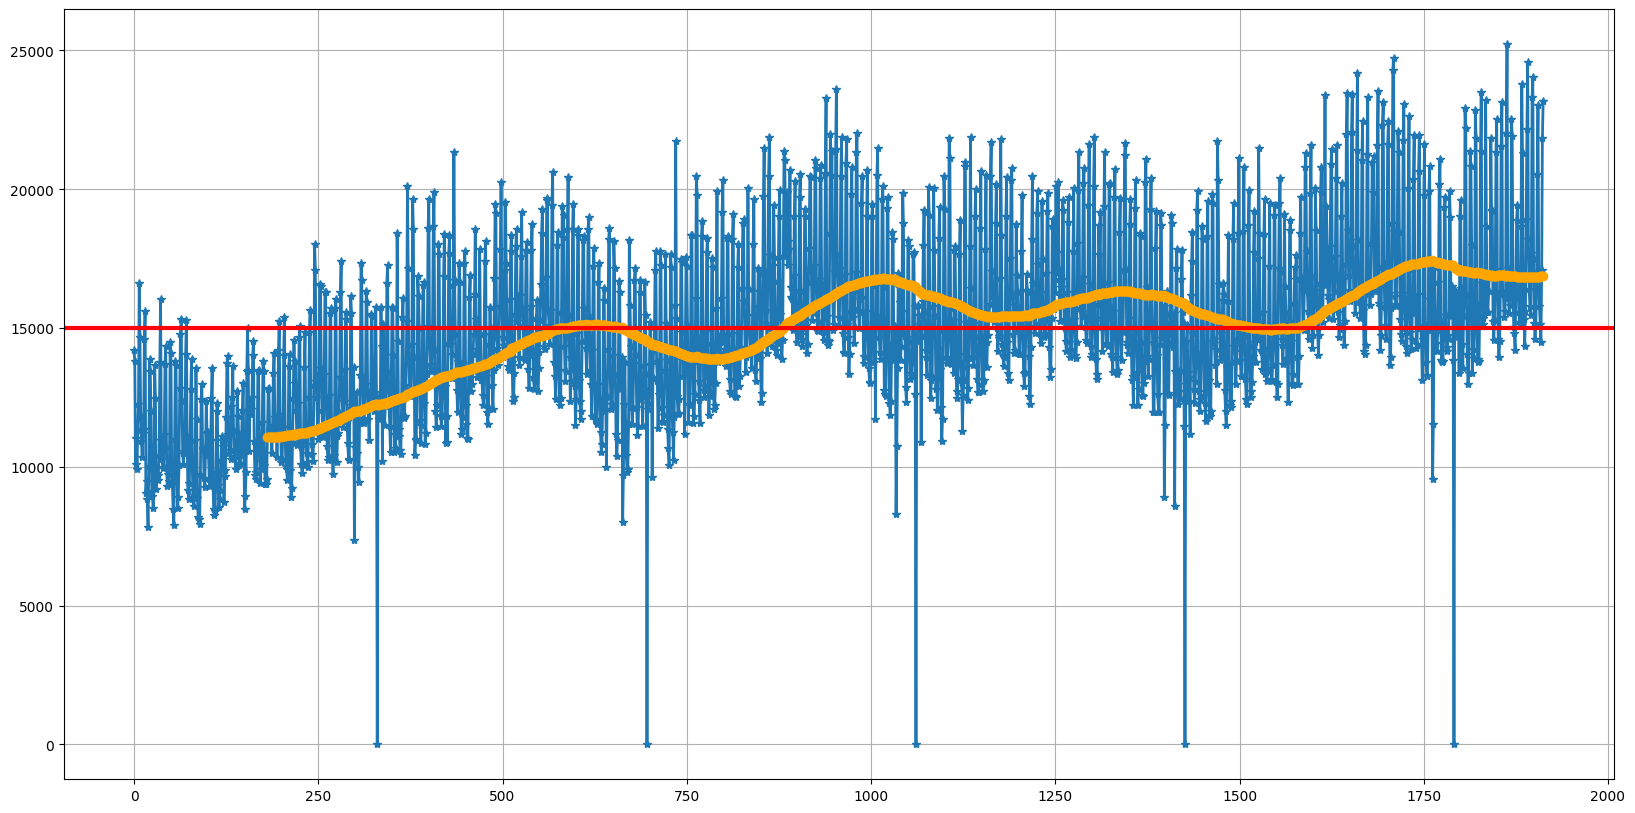

In [ ]:
w = interactive(
    plot_data_level,
    level='state',
    series_ids= state_ids,
    periods= 182,
)
display(w)

interactive(children=(Dropdown(description='series_ids', options=('HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HO…

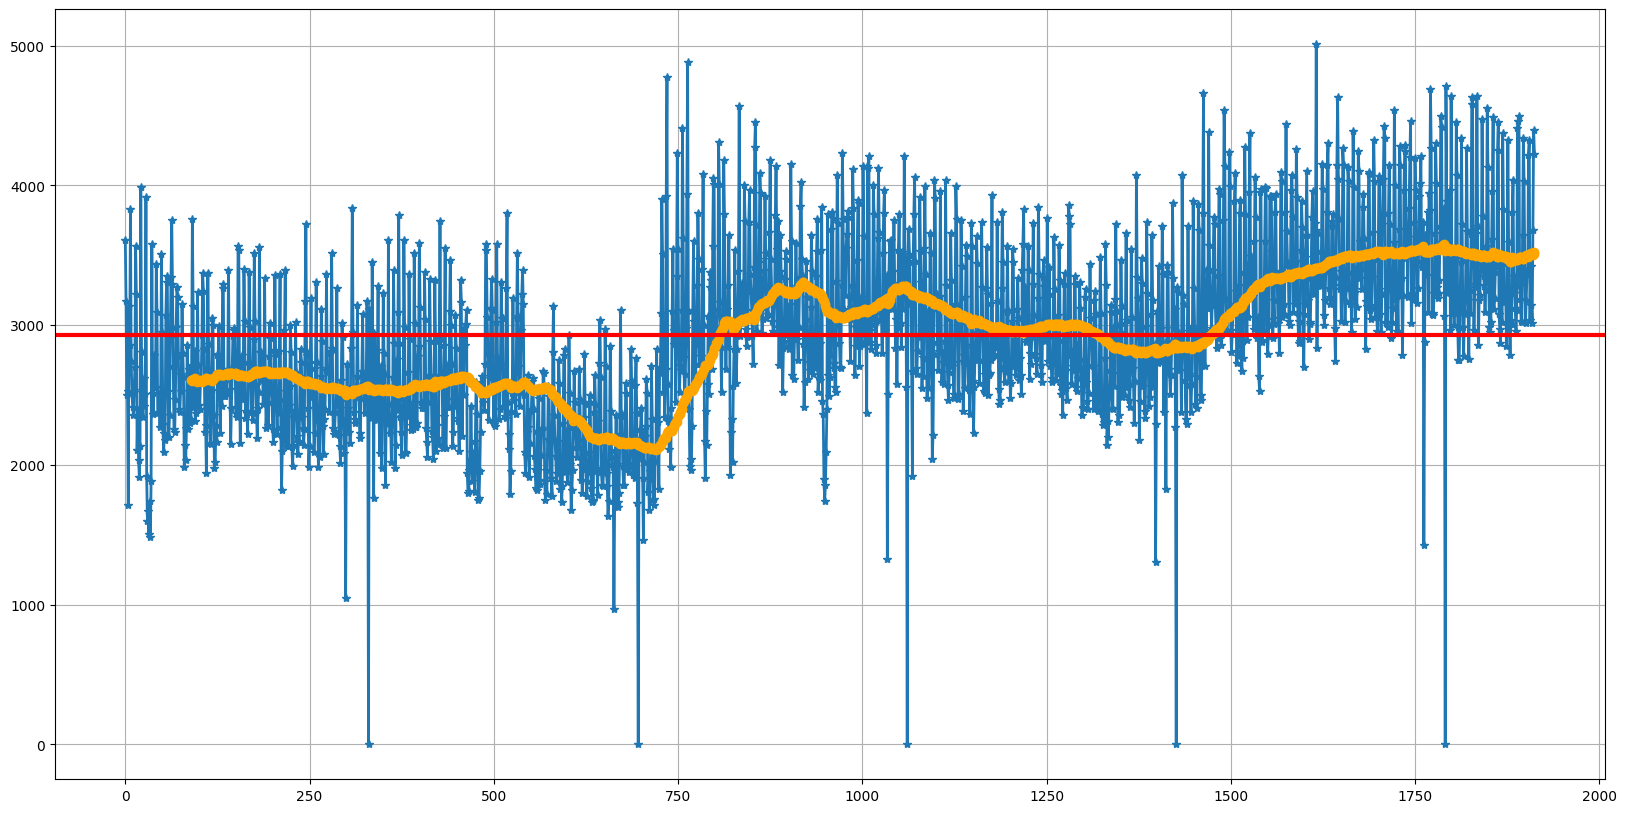

In [ ]:
w = interactive(
    plot_data_level,
    level='dept',
    series_ids= dept_ids,
    periods=90
)
display(w)

###ARIMA item level¶


In [ ]:
import seaborn as sns

def disp_boxplot(data, title, xlabel, ylabel):
    sns.set_style('whitegrid')
    sns.set_context('poster')
    palette = sns.color_palette("mako_r", 6)
    width= len(data.columns) *4
    plt.figure(figsize=(width,20))
    ax = sns.boxplot(data=data, palette = palette)
    ax.set(title = title,
          xlabel = xlabel,
          ylabel = ylabel)

    try:
        ax.axhline(y = data.mean().mean(), color = 'b', label = 'Mean of all datapoints', linestyle = '--', linewidth = 1.5)
        ax.ahline(y = data.median().median(), color = 'g', label = 'Median of all datapoints', linestyle = '--', linewidth = 1.5)
    except:
        pass

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

    plt.legend()
    plt.show()

<ipython-input-25-cd99a247147f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_sum = train_sales.groupby(['store_id']).sum().T.reset_index(drop = True)


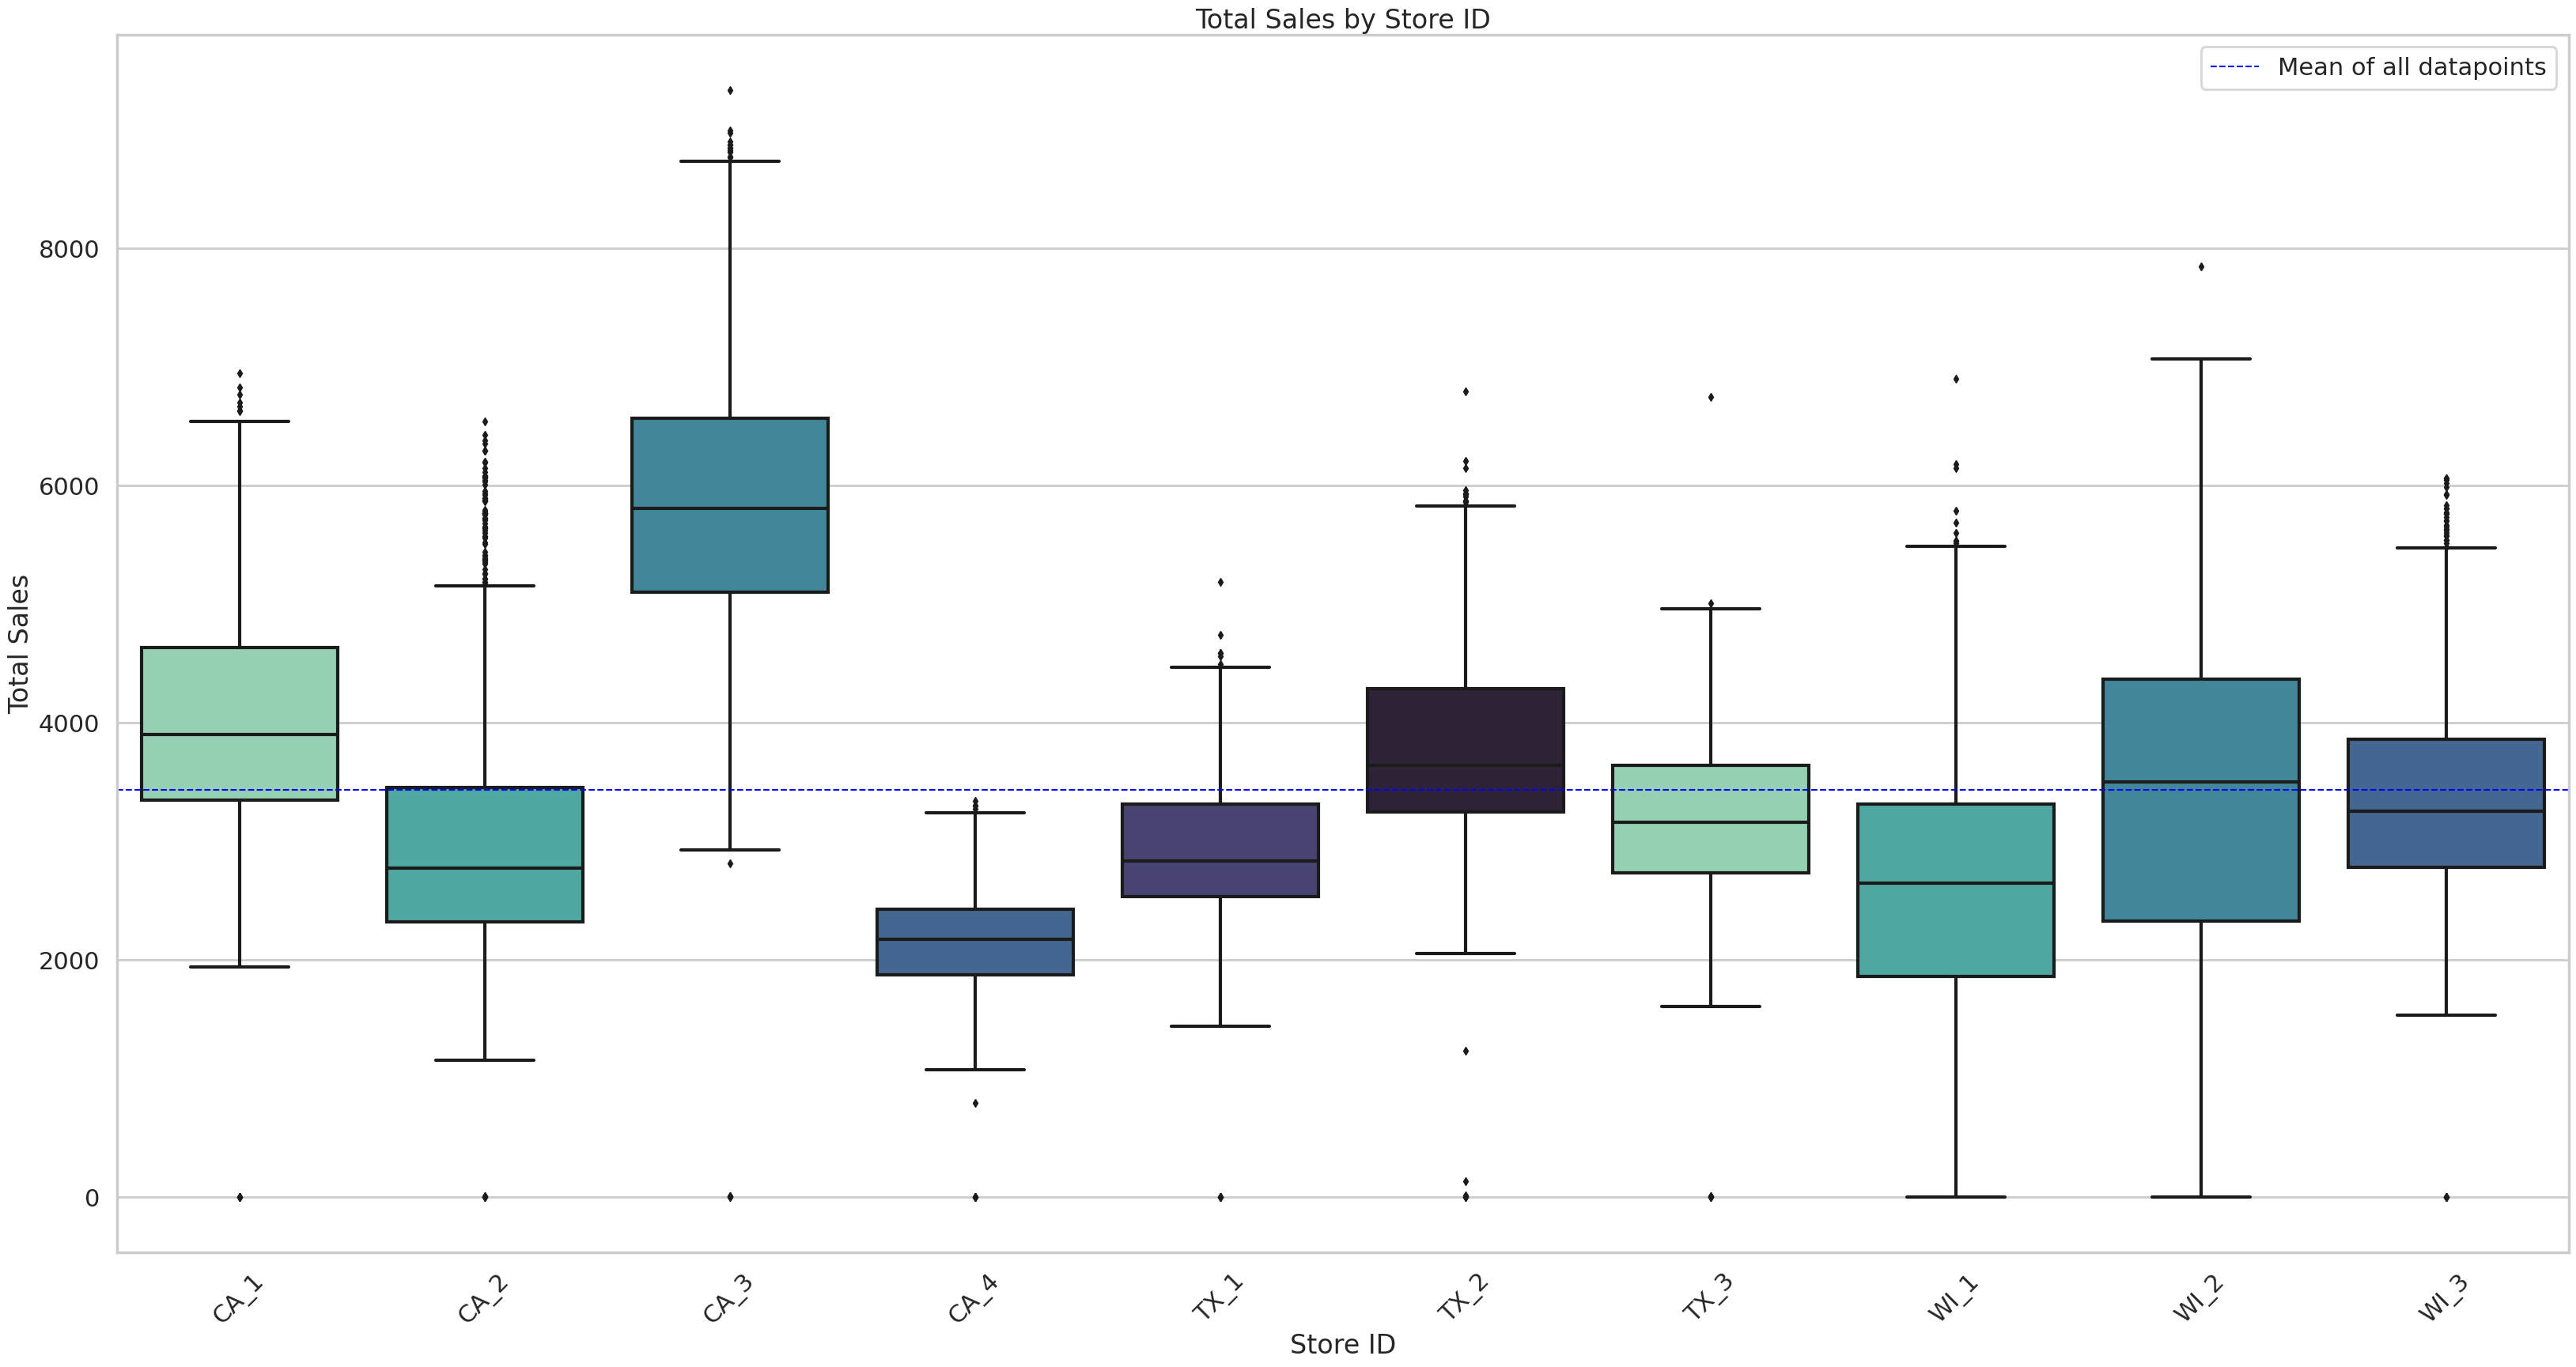

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
days_per_week = 7

store_sum = train_sales.groupby(['store_id']).sum().T.reset_index(drop = True)
#store_mean = train_sales.groupby(['store_id']).mean().T.reset_index(drop = True)

disp_boxplot(data = store_sum, title = 'Total Sales by Store ID',
            xlabel = "Store ID", ylabel = "Total Sales")


#disp_boxplot(data = store_mean, title = 'Mean Sales Per Day by Store ID',xlabel = "Store ID", ylabel = "Total Sales")

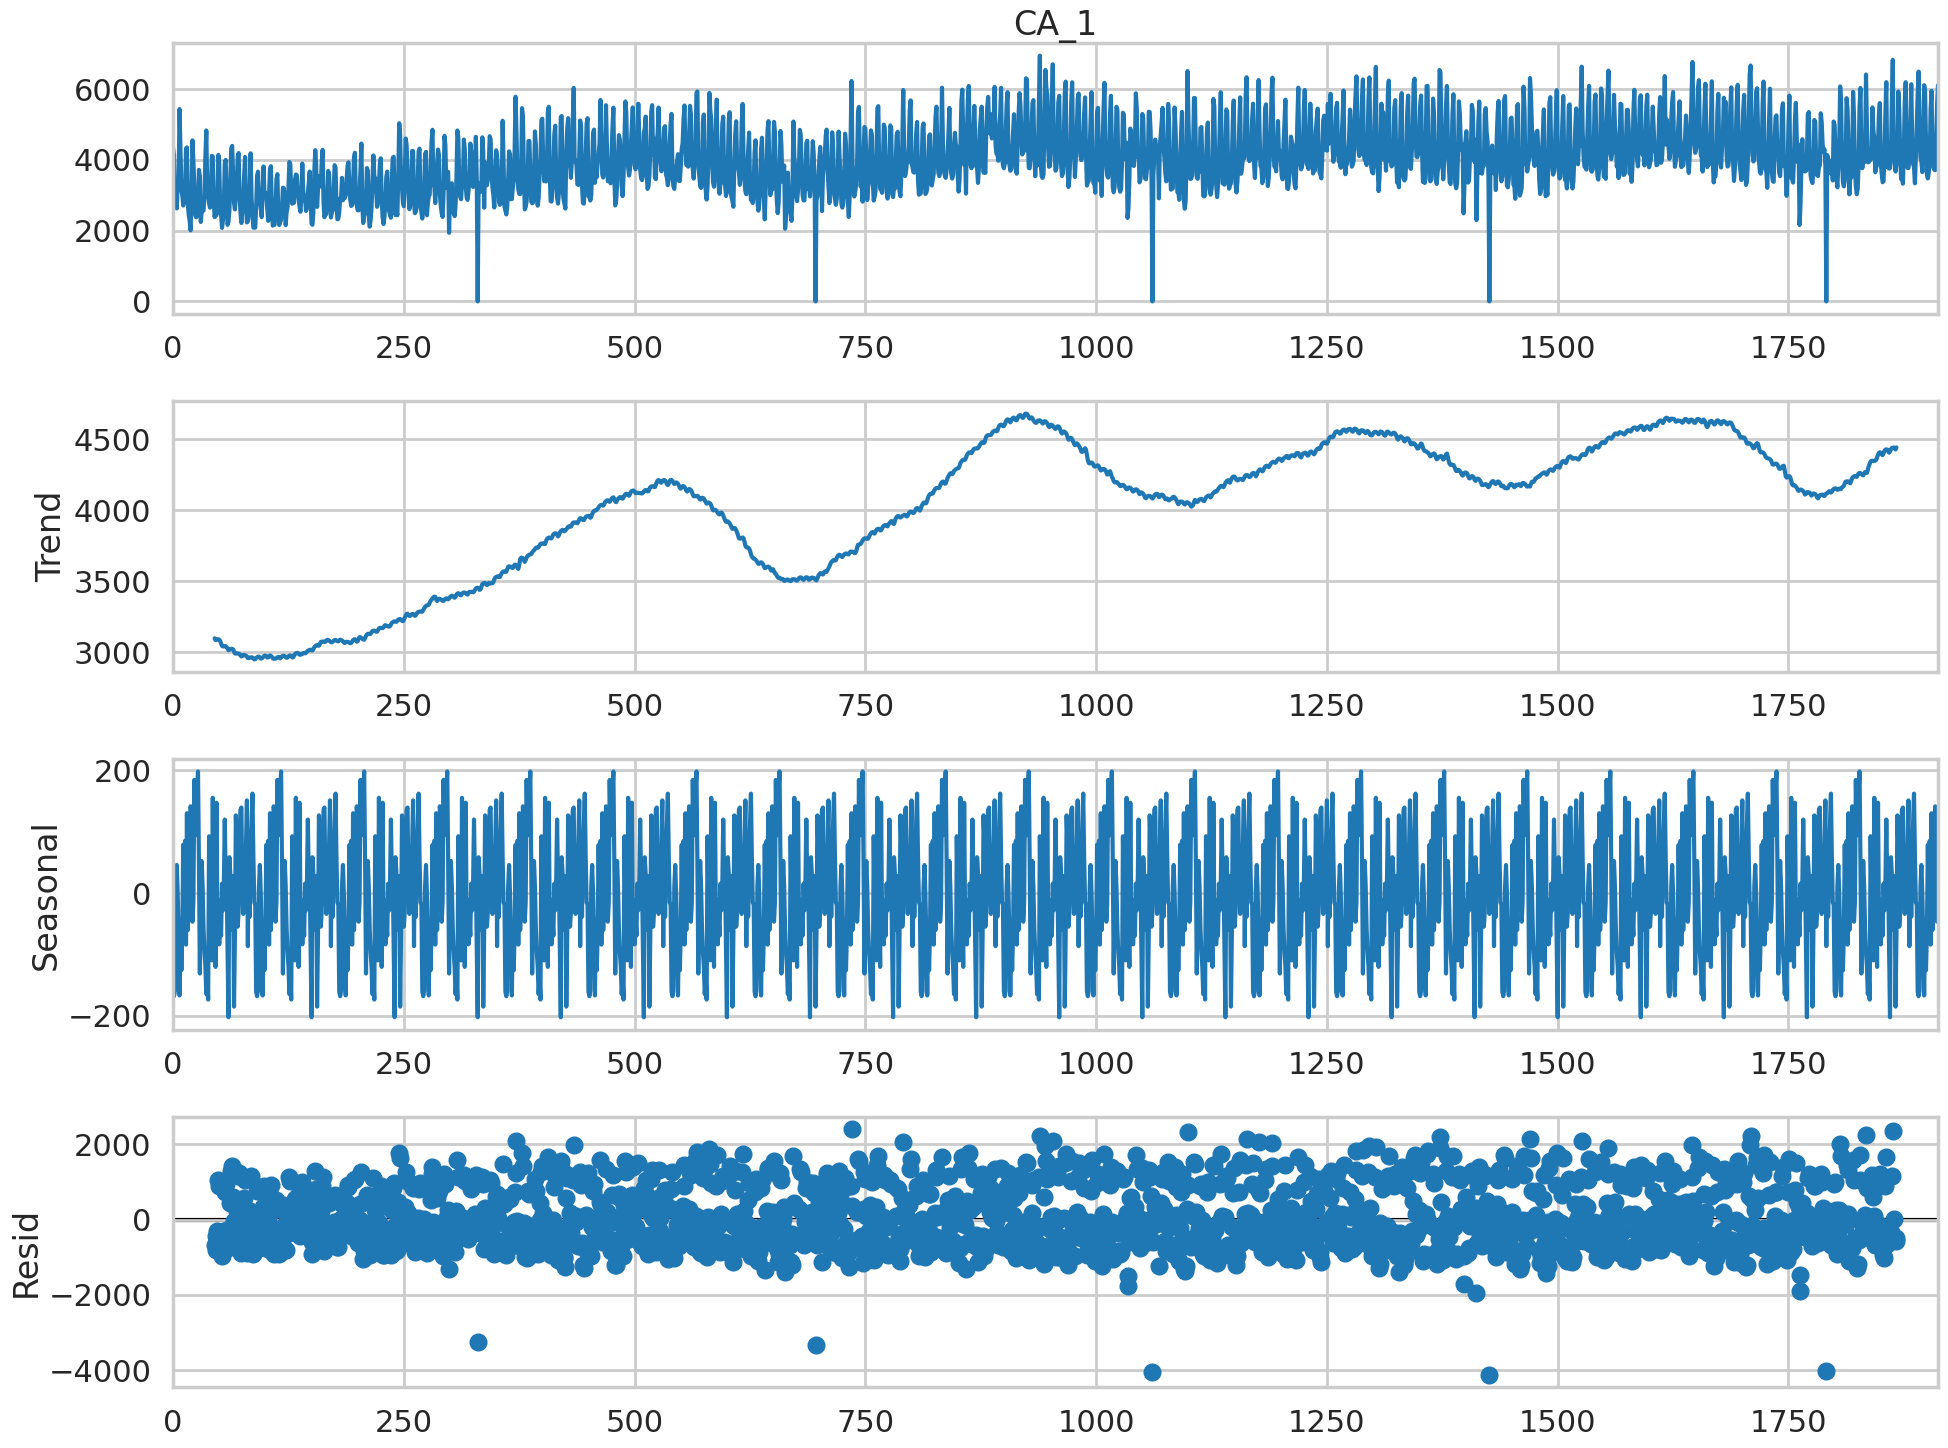

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)
time_series = store_sum["CA_1"]
sj_sc = seasonal_decompose(time_series, period = 90)
sj_sc.plot()

plt.show()

### SARIMA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def SMAPE(forecast,ground_truth):
    return round(
        np.mean(
            np.abs(forecast - ground_truth) /
            ((np.abs(forecast) + np.abs(ground_truth)))
        ), 2
    )

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_train_test(t_series, p = 2, d = 1, r = 2, NUM_TO_FORECAST = 56, do_plot_results = True):
    NUM_TO_FORECAST = NUM_TO_FORECAST  # Similar to train test splits.
    dates = np.arange(t_series.shape[0])

    model = SARIMAX(t_series, order = (p, d, r), trend = 'c')
    results = model.fit()
    results.plot_diagnostics(figsize=(18, 14))
    plt.show()

    forecast = results.get_prediction(start = -NUM_TO_FORECAST, end = len(t_series)+NUM_TO_FORECAST)
    mean_forecast = forecast.predicted_mean
    conf_int = forecast.conf_int()
    print(mean_forecast)
    print(mean_forecast.shape)
        # Plot the forecast
    plt.figure(figsize=(18,10))
    plt.plot(dates[-NUM_TO_FORECAST:],
            mean_forecast.values[: NUM_TO_FORECAST],
            color = 'red',
            label = 'forecast')


    plt.plot(dates[-NUM_TO_FORECAST:],
            t_series.iloc[-NUM_TO_FORECAST:],
            color = 'blue',
            label = 'actual')
    plt.legend()
    plt.title('Predicted vs. Actual Values')
    plt.show()

    residuals = results.resid
    mae_sarima = np.mean(np.abs(residuals))
    smape_sarima= SMAPE(mean_forecast[: NUM_TO_FORECAST],t_series.iloc[-NUM_TO_FORECAST:])
    print('Mean absolute error: ', mae_sarima)
    print('SMAPE: ', smape_sarima)
    print(results.summary())
    return mae_sarima, smape_sarima

In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math

def test_stationarityDF(timeseries): ##Dickey-Fuller Test
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No of Observesations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict


def arima_train_test(t_series, p = 2, d = 1, r = 2, NUM_TO_FORECAST = 56, do_plot_results = True):
    NUM_TO_FORECAST = NUM_TO_FORECAST
    dates = np.arange(t_series.shape[0])

    model = ARIMA(t_series, order = (p, d, r))
    results = model.fit()
#     results.plot_diagnostics(figsize=(18, 14))
#     plt.show()
    print(results.summary())
    plot_predict(results)

    #residuals = pd.DataFrame(results.resid)


    residuals = results.resid
    mae_sarima = np.mean(np.abs(residuals))
    print('Mean absolute error: ', mae_sarima)

In [ ]:
time_series_2=train_sales[time_series_columns].T[0]


                               SARIMAX Results                                
Dep. Variable:                   CA_1   No. Observations:                 1913
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -15286.867
Date:                Fri, 30 Jun 2023   AIC                          30583.734
Time:                        17:03:43   BIC                          30611.517
Sample:                             0   HQIC                         30593.958
                               - 1913                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4024.1589     31.530    127.628      0.000    3962.361    4085.957
ar.L1          0.8987      0.066     13.578      0.000       0.769       1.028
ar.L2         -0.4192      0.049     -8.564      0.0

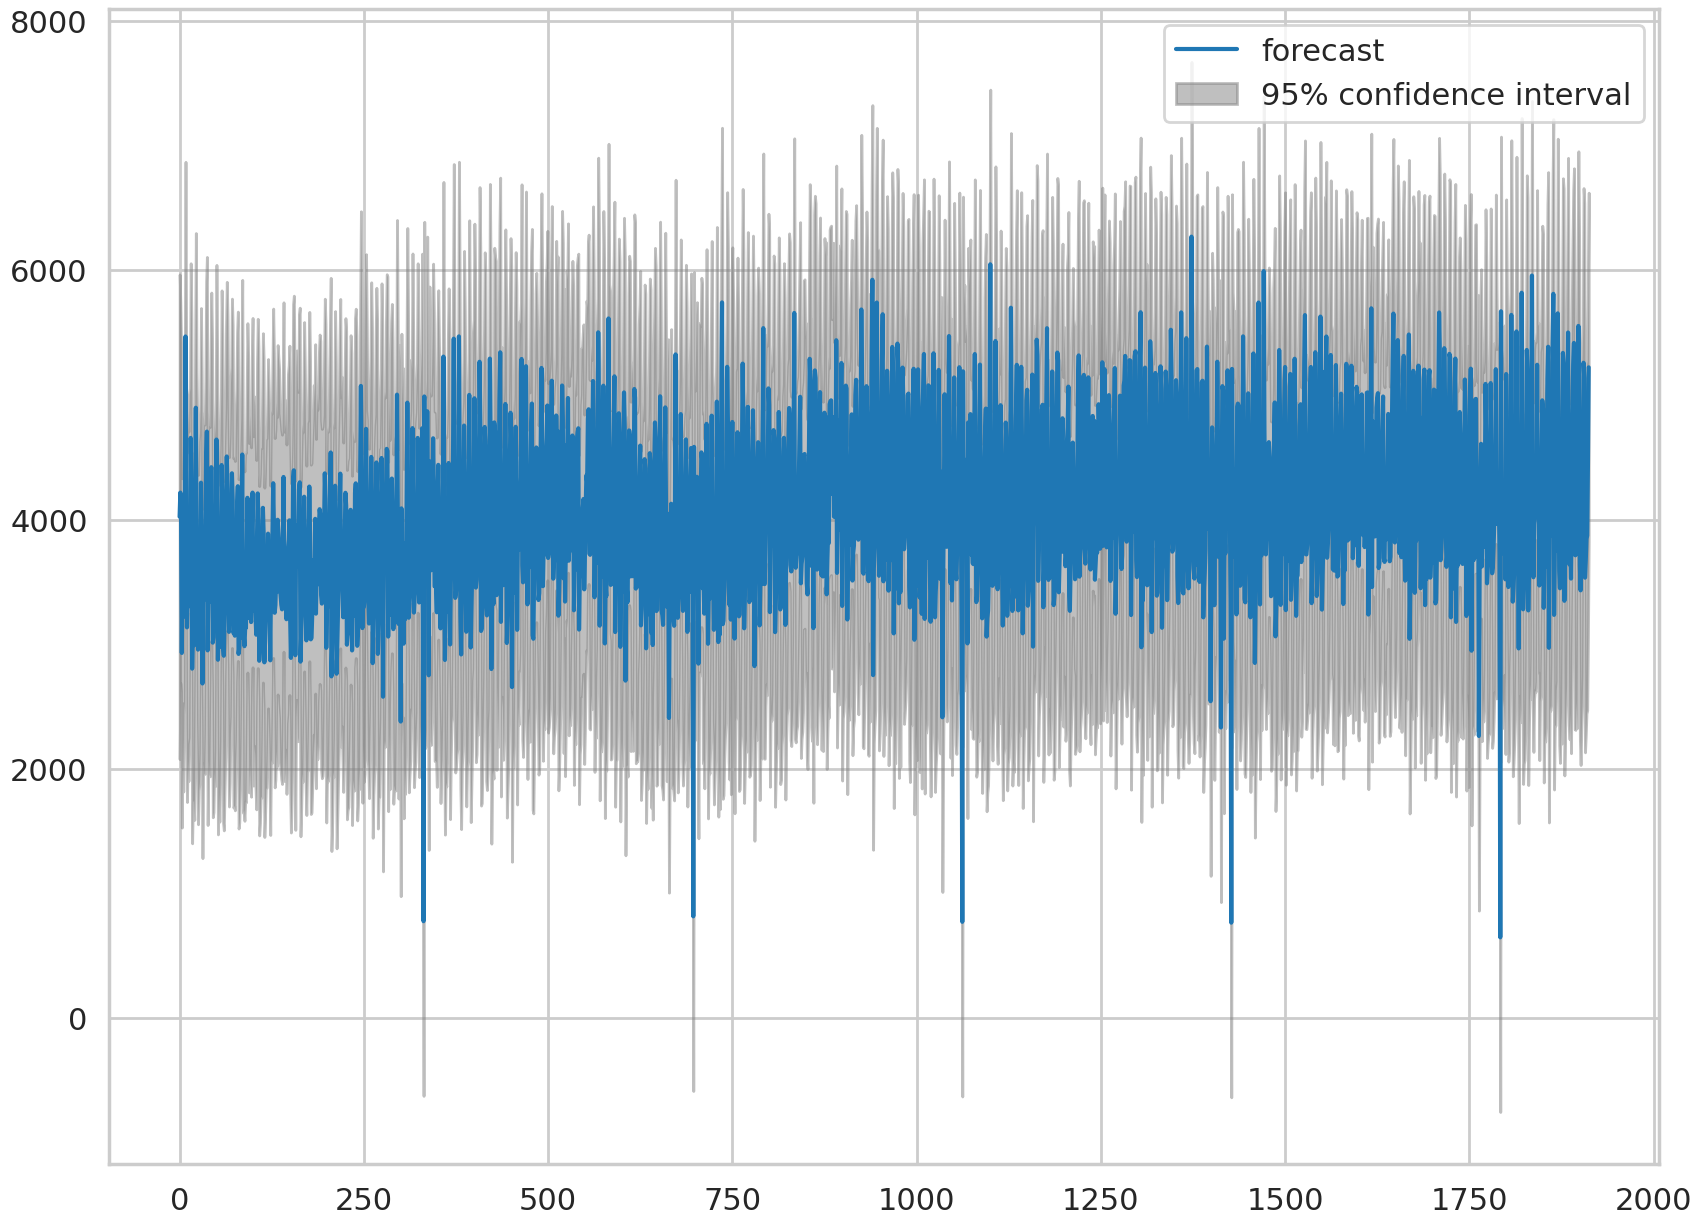

In [ ]:
arima_train_test(time_series,p=2, d=0, r=1)


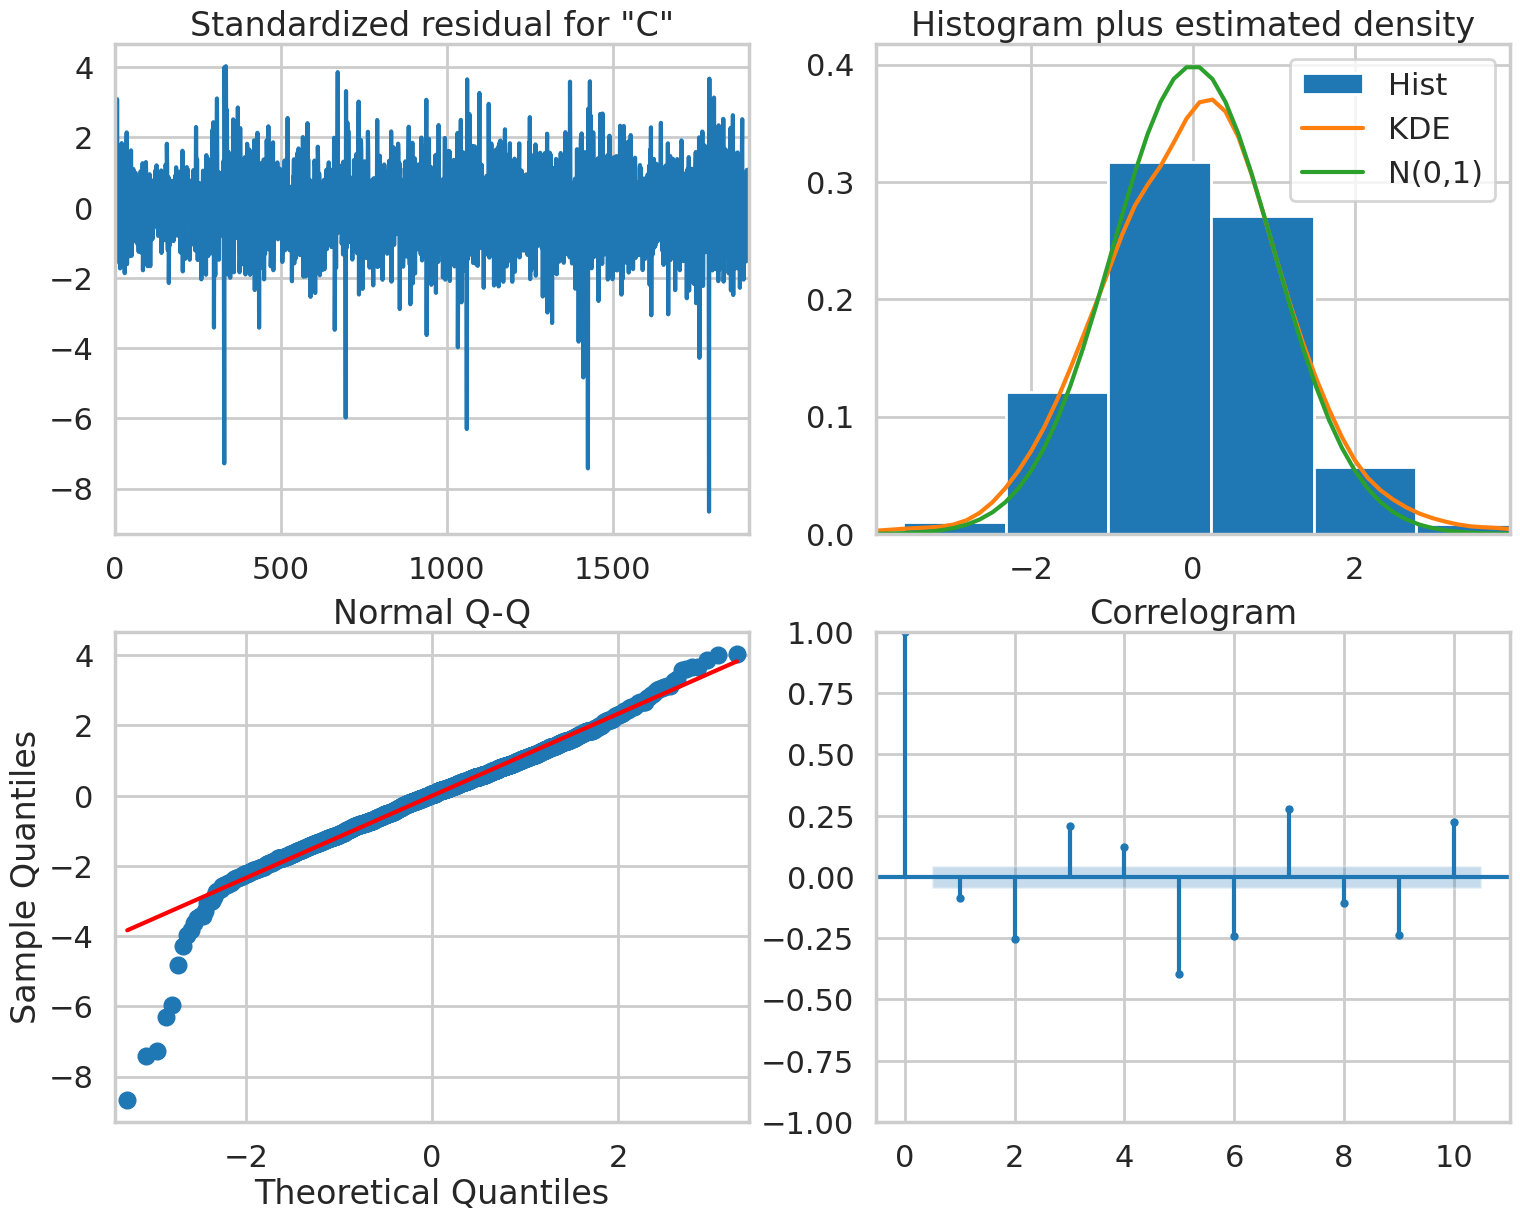

1857    4994.329099
1858    3148.344534
1859    3257.358371
1860    4170.706240
1861    4713.837909
           ...     
1965    4670.880441
1966    4886.836218
1967    5125.505892
1968    5213.112801
1969    5094.972040
Name: predicted_mean, Length: 113, dtype: float64
(113,)


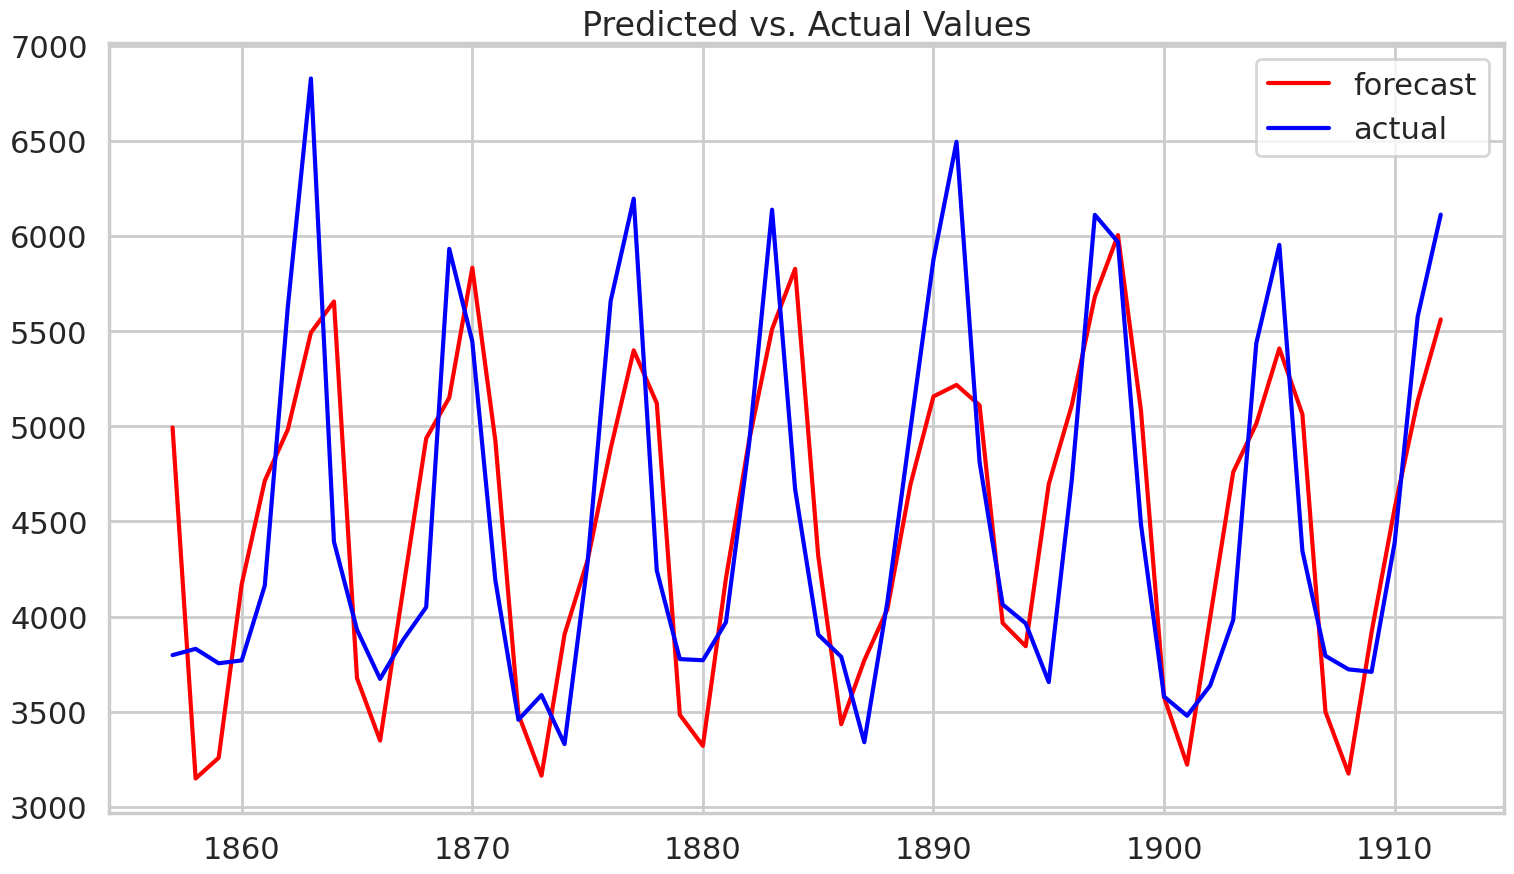

Mean absolute error:  452.5418832491615
SMAPE:  0.06
                               SARIMAX Results                                
Dep. Variable:                   CA_1   No. Observations:                 1913
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -14974.851
Date:                Fri, 30 Jun 2023   AIC                          29963.701
Time:                        17:03:59   BIC                          30002.593
Sample:                             0   HQIC                         29978.014
                               - 1913                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6707      4.189      0.399      0.690      -6.540       9.882
ar.L1          0.9242      0.021     44.290      0.000       0.883       0.965

(452.5418832491615, 0.06)

In [ ]:
sarima_train_test(time_series,p=3, d=1, r=2)
